## Phase Space

Conservative systems are govenred by Hamilton's equation of motion. That is changes in position and momenta stay on the surface: $H(p,q)=E$

$$\dot{q} = \frac{\partial H}{\partial p}$$

$$\dot{p} = -\frac{\partial H}{\partial q}$$

To see how ensemble N body mechanical conervative system evoleves we are introducing probability distribution of classical trajecotires in phase space

$$\rho(p,q,t)dq dp $$

### Continuity equation and Liuville's theorem

$$\frac{\partial \rho(p,q,t)}{\partial t} = -\nabla J = - \nabla(\rho \vec{v})$$

Where flux $J= \rho \vec{v}$ is defined in terms of the velcotiy of points in phase space $v = (\dot{q},\dot{p})$. Combinging the continuity expression combined with Hamilton's equation of motion:

$$\dot{p_i} = -\partial_{q_i} H \,\,\,\,\ \dot{q_i} = \partial_{p_i} H$$



$$\frac{\partial \rho(p,q,t)}{\partial t} + \sum_i \Big [ \frac{\partial \rho}{\partial q_i}\dot{q_i}+\frac{\partial \rho}{\partial p_i} \dot{p_i} \Big] + \rho \sum_i \Big [ \frac{\partial \dot{q_i}}{\partial q_i}+  \frac{\partial \dot{p_i}}{\partial p_i}  \Big]=0$$ 

Where the last term is zero one we plug Hamilton's equation. We thus arrive at a crucial conclusion that the space volume is preserved during conservative dynamics 

$$\frac{\partial \rho(p,q,t)}{\partial t} + \sum_i \Big [ \frac{\partial \rho}{\partial q_i}\dot{q_i}+\frac{\partial \rho}{\partial p_i} \dot{p_i} \Big]=\frac{d \rho}{ dt} = 0$$ 

Furthermore we see that the time dependence of phase space probability density vanishes if it is a function of hamiltonian $\rho = f(H)$

$$\frac{\partial \rho}{\partial t} = \sum_i \Big [ \frac{\partial \rho}{\partial q_i}\cdot{q_i}+\frac{\partial \rho}{\partial p_i}\cdot{p_i} \Big] = -\{H,\rho \}$$

### Liuville theorem illustrated

According to Liuvile's theorem small phase space area element under time evolution gets deform but preserves the volume. For example, assume the initial distribution is a rectangle in phase space (x , v)  

$${x 0 − d x ≤ x ≤ x 0 + d x}$$  

$$ {v 0 − d v ≤ v ≤ v 0 + d v } $$

As time progresses this rectangle will deform, but its area will not change (assuming $d x$  and $d v$  are sufficiently small which ensure energy conservation)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci

In [5]:
from matplotlib.patches import Polygon # for making rectangles from four points

a = 1.0             # acceleration
x0, v0 = 0., 0.    # center of initial phase space element
dx, dv = 0.1, 0.1  # (half of) width of initial phase space element

p0 = np.array(((x0-dx,v0-dv),(x0-dx,v0+dv),(x0+dx,v0+dv),(x0+dx,v0-dv)))     # initial phase space element

def propagate(p0, t):
    
    """Propagates a phase space patch p0 for time t."""
    
    x0, v0 = p0.T
    x = x0 + v0*t + 0.5*a*t**2
    v = v0 + a*t
    
    return np.column_stack((x,v))

(-0.5, 3.5)

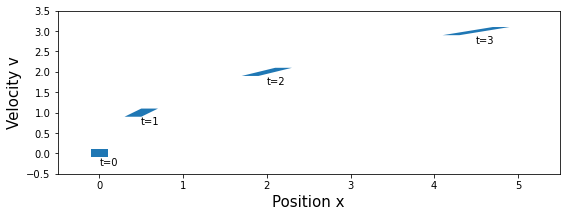

In [8]:
fig, ax = plt.subplots(figsize=(9,3))


for t in np.arange(4):
    
    p = propagate(p0,t)  

    x, y = np.mean(p,axis=0)
    ax.add_patch(Polygon(p))
    ax.text(x, y-0.3, f"t={t}")
    
ax.set_xlabel("Position x", fontsize=15)
ax.set_ylabel("Velocity v", fontsize=15)
ax.set_xlim(-0.5,5.5)
ax.set_ylim(-0.5,3.5)

### Hamiltonian, conservative dynamics in phase space

In [4]:
# range of x and y grid
xmax = 5
ymax = 5

# make a grid of x and y values, Y = dot X
X, Y = np.meshgrid(np.arange(-xmax,xmax,.1), np.arange(-ymax,ymax,.1) )

H = 0.5*Y*Y +0.5*X*X   #here is the Hamiltonian

#cs = plt.contour(X,Y,H,20,cmap='inferno')
#plt.clabel(cs,inline=1,fontsize=10)

plt.xlabel('q')
plt.ylabel('dq/dt')
plt.axis([-1.1*xmax, 1.1*xmax, -1.1*ymax, 1.1*ymax])

# Hamilton's equations define a vector field U,V
U =   Y
V = - X

Q = plt.streamplot(X,Y, U, V,density=1)

In [5]:
# range of x and y grid
xmax = np.pi*2.0
ymax = 2

# make a grid of x and y values, Y = dot X
X, Y = np.meshgrid(np.arange(-xmax,xmax,.1),np.arange(-ymax,ymax,.1) )

epsilon=0.3

H = 0.5*Y*Y  - epsilon*np.cos(X)    #here is the Hamiltonian

# Hamilton's equations define a vector field U,V
U = Y
V = -epsilon*np.sin(X)

#cs =plt.contour(X,Y,H,10,cmap='inferno')
#plt.clabel(cs,inline=1,fontsize=10)

plt.xlabel('x')
plt.ylabel('dx/dt')
plt.axis([-xmax, xmax, -ymax, ymax])



Q = plt.streamplot(X,Y, U, V,density=1) # plot the vector field 

### Counting of statss in phase-space 

**Quantum Mechanics**

- In Quantum mechanics, we simply count the number of states, which is natural and easy due to the discreteness of energy levels.  The question now is how to deal with classical systems that have continuous energy functions.

- We clarify this issue using the example of a collection of independent 1D harmonic oscillators to find an expression coinciding with the QM description.

$$E= \sum_j\Big(n_j+\frac{1}{2}\Big)\hbar\omega$$

- For a harmonic oscillator, the number of states corresponding to E is obtained simply as:

$$N_E \approx \frac{E}{\hbar \omega} $$

**Classical Mechanics**

/var/folders/3h/w4n54dz57dvbhgvz68gdv0f0f3hkmm/T/ipykernel_48781/2847915048.py:16: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt(2*m*E - m*omega**2*x**2)
/var/folders/3h/w4n54dz57dvbhgvz68gdv0f0f3hkmm/T/ipykernel_48781/2847915048.py:16: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt(2*m*E - m*omega**2*x**2)


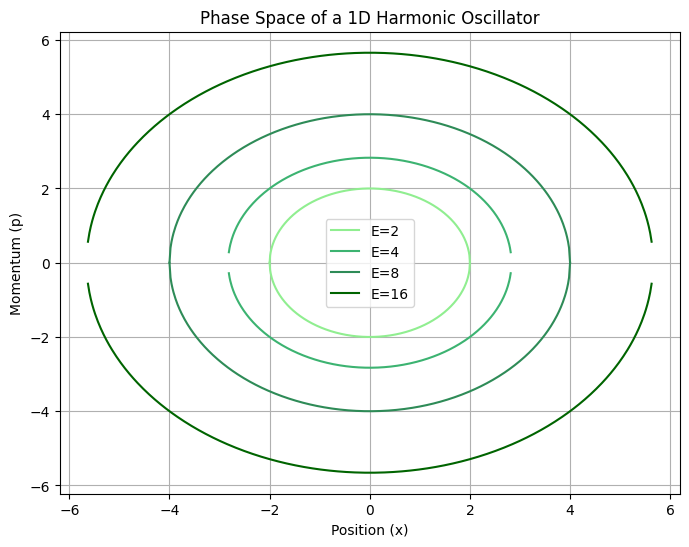

In [8]:
# Set up the figure and axes for plotting again with green gradients
plt.figure(figsize=(8, 6))

m=1
omega=1
energies = [2, 4, 8, 16]
# Generate and plot phase space trajectories with a gradient of green colors
colors = ['lightgreen', 'mediumseagreen', 'seagreen', 'darkgreen']
for i, E in enumerate(energies):
    # The maximum position (amplitude) and momentum for a given energy
    A = np.sqrt(2*E/m/omega**2)
    p_max = np.sqrt(2*m*E)
    
    # Generate position and momentum values
    x = np.linspace(-A, A, 400)
    p = np.sqrt(2*m*E - m*omega**2*x**2)
    
    # Plotting the phase space trajectory with a gradient of green colors
    plt.plot(x, p, label=f'E={E}', color=colors[i])
    plt.plot(x, -p, color=colors[i])  # Mirror image for negative momentum

# Labeling the plot
plt.title('Phase Space of a 1D Harmonic Oscillator')
plt.xlabel('Position (x)')
plt.ylabel('Momentum (p)')
plt.legend()
plt.grid(True)
plt.show()


**Planck constant quantifies number of states in a phase-space volume**

In CM, not having discrete count of states we are forced to somehow quantify the "volume" of states occupied by the harmonic oscillator at E as a measure of number of states

$$\Big[\frac{p}{(2mE)^{1/2}}\Big]^2 + \Big[\frac{q}{(2E/m\omega)^{1/2}}\Big]^2 = 1$$ 


$$V = \pi  \cdot (2mE)^{1/2} \cdot (2E/m\omega)^{1/2} =\frac{2\pi E}{\omega}$$

We see that we are missing an important factor of $h$ which does not exist in CM! Otherwise the expression is identical to QM expression. Hence we introduce a rule to divide the number of states in CM by $h$ 

$$N_E = \frac{V}{h}$$

**General expression of number of states in classical mechanics**

Generalizing the expression for N number of indistinguishable particles with 3N degrees of freedom we obtain:

$${N_E = \frac{1}{N! h^{3N}}\int_{H(p^N,q^N)\leq E} dp^N dq^N}$$

- Or we can use heavy side function $\theta(x)$ to lift the restriction on integration limits:
  
$$N_E = \frac{1}{N! h^{3N}}\int dp^N dq^N \theta(H(p^N,q^N) -E)$$

### Density of states

We will show that for macroscopic system it is convenient to work with denisty of states because number of states in outer thin shell $\Delta E$ is an excellent approximation to total number of states


$$\Omega(E) =\frac{d N(E)}{d E}$$

$$N(E)\sim \Omega(E)\Delta E$$

- Taking the derivative with respect to the energy we get the delta function under the integral
  
$$\boxed{\Omega(E) = \frac{1}{N! h^{3N}}\int dp^N dq^N \delta(H(p^N,q^N) -E)}$$

- Where $\theta(x-a)$ is a step function (Heviside function) derivative of which gives rise to delta function $\delta(x) =\frac{d}{dx}\theta(x-a)$

- Watch out for N! The indistinguishability of the particles has consequences for thermodynamics